<a href="https://colab.research.google.com/github/carlos-alves-one/-SSDM-Coursework-2/blob/main/Regression_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Statistics and Statistical Data Mining
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework No.2

### Load the data

> Run the code in Python 3

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


> Run the code in R

In [1]:
# Load necessary libraries for this project

library(tidyverse)    # for data manipulation and visualization

install.packages("caret")
library(caret)        # for machine learning

library(rpart)        # for decision trees

install.packages("randomForest")
library(randomForest) # for random forest algorithm

install.packages("gbm")
library(gbm)          # for gradient boosting machines

library(e1071)        # for SVM and other algorithms

# Load the 'readr' library for data import and manipulation in R
library(readr)

# Set seed for reproducibility
set.seed(123)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


Th

In [2]:
# Loading the datasets using base R read.csv function
train_data <- read.csv("/content/drive/MyDrive/credit_risk/creditdefault_train.csv", sep = ",")
test_data  <- read.csv("/content/drive/MyDrive/credit_risk/creditdefault_train.csv", sep = ",")

# Displaying the first few rows of the Credit Default training dataset
head(train_data)

# Displaying the first few rows of the Credit Default test dataset
head(test_data)


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,689,0,0,0,0,689,0,0,0,0
2,0,50000,2,2,1,37,0,0,0,0,⋯,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,0,50000,1,2,1,57,-1,0,-1,0,⋯,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,0,50000,1,1,2,37,0,0,0,0,⋯,57608,19394,19619,20024,2500,1815,657,1000,1000,800
5,0,500000,1,1,2,29,0,0,0,0,⋯,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
6,0,100000,2,2,2,23,0,-1,-1,0,⋯,601,221,-159,567,380,601,0,581,1687,1542


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,689,0,0,0,0,689,0,0,0,0
2,0,50000,2,2,1,37,0,0,0,0,⋯,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,0,50000,1,2,1,57,-1,0,-1,0,⋯,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,0,50000,1,1,2,37,0,0,0,0,⋯,57608,19394,19619,20024,2500,1815,657,1000,1000,800
5,0,500000,1,1,2,29,0,0,0,0,⋯,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
6,0,100000,2,2,2,23,0,-1,-1,0,⋯,601,221,-159,567,380,601,0,581,1687,1542


# Problem Formulation

This project aims to predict whether a credit card holder will default on their payment in the next month. We will use a binary classification approach with the response variable Y indicating default payment (Yes = 1, No = 0). The challenge is to build and select a predictive model that performs well on unseen data, balancing the trade-off between underfitting and overfitting.

# Data Exploratory Analysis

## Initial Exploration of the Dataset

In [3]:
# Exploratory Data Analysis
# Summary of the training data
summary(train_data)


       Y                X1               X2              X3      
 Min.   :0.0000   Min.   : 10000   Min.   :1.000   Min.   :0.00  
 1st Qu.:0.0000   1st Qu.: 50000   1st Qu.:1.000   1st Qu.:1.00  
 Median :0.0000   Median :140000   Median :2.000   Median :2.00  
 Mean   :0.2212   Mean   :167450   Mean   :1.605   Mean   :1.85  
 3rd Qu.:0.0000   3rd Qu.:240000   3rd Qu.:2.000   3rd Qu.:2.00  
 Max.   :1.0000   Max.   :800000   Max.   :2.000   Max.   :6.00  
       X4              X5              X6                 X7         
 Min.   :0.000   Min.   :21.00   Min.   :-2.00000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.00000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.00000   Median : 0.0000  
 Mean   :1.556   Mean   :35.37   Mean   :-0.02047   Mean   :-0.1309  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.00000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :75.00   Max.   : 8.00000   Max.   : 8.0000  
       X8               X9               X10    

**Given the detailed information about the variables in the dataset, we can draw some conclusions and suggest potential steps for further analysis:**

- The dataset contains 24 columns and 15,000 rows, all being integer type

## Variable Types


- X1 (Credit Amount): This should be a numeric variable as it represents amounts in dollars.

- X2 (Gender): Since it is coded as 1 (male) and 2 (female), it is a categorical variable. Consider converting it to a factor with two levels.

- X3 (Education), X4 (Marital Status): These are categorical variables and should be converted to factors with their respective levels.

- X5 (Age): This is a numeric variable.

- X6-X11 (Repayment Status): These are ordinal categorical variables. They have an inherent order (-1, 1, 2, ..., 9) and should be treated as factors with ordered levels.

- X12-X17 (Bill Statement Amount), X18-X23 (Previous Payment Amount): These should be numeric variables representing monetary values.


## Data Integrity and Cleaning

- We need to ensure that the data types in the dataset match these specifications. They must be converted to the appropriate types if they are all currently 'character' types.

- Check for missing or unusual values. For example, ensure that only the specified categories are present in categorical variables.

### Check for Missing Values

In [4]:
# Check for missing values in the training dataset
sum(is.na(train_data))


[1] 0

The output is zero, meaning there are no missing values (NA) in the train_data dataset. Every element in the dataset has a defined, non-missing value. This is generally a good sign for data quality, as missing data can complicate analysis and require additional steps for handling.

## Visualizing Distributions of Variables

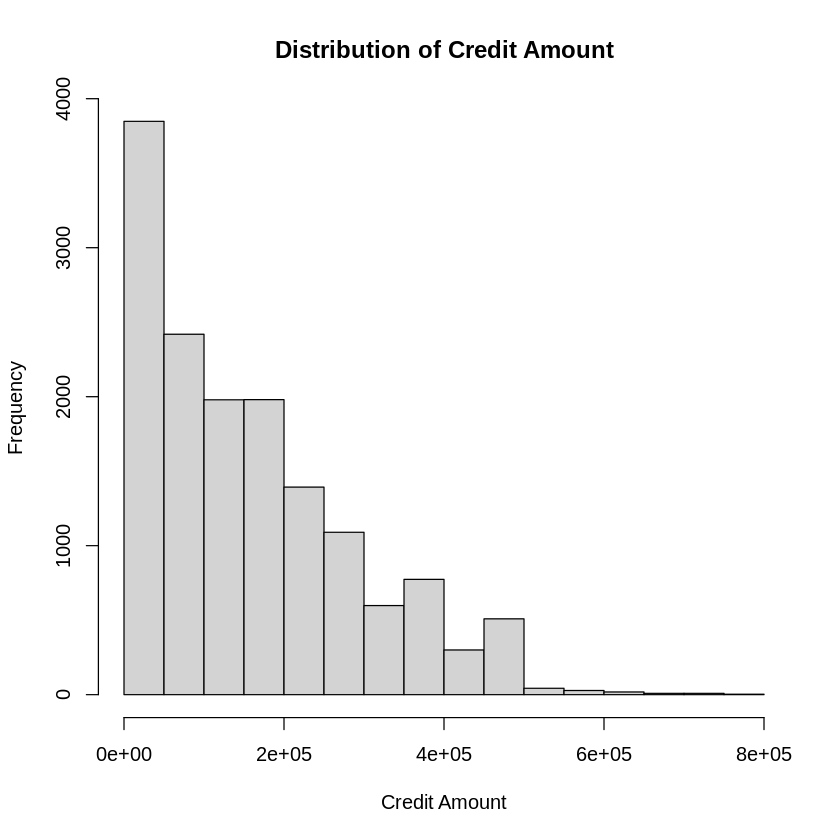

In [5]:
# Plotting the distribution of Credit Amount in the training data
hist(train_data$X1, main = "Distribution of Credit Amount", xlab = "Credit Amount")


The histogram above displays the distribution of credit amounts. The X-axis, labelled "Credit Amount," shows the range of credit amounts, and the Y-axis, labelled "Frequency," indicates how often each range of credit amounts occurs within the dataset.

Here are a few observations:

- The distribution is right-skewed, meaning there are more lower credit amounts than higher ones.
- Most credit amounts are concentrated in the lower range (close to 0).
- As the credit amount increases, the frequency of those credit amounts decreases.
- Very few high credit amounts are compared to the lower and middle ranges.

This distribution is standard in financial data, where many people take out small loans, and fewer take out substantial loans. For a financial institution, the analysis could suggest focusing its products and services towards individuals who require smaller credit amounts, as that is where the highest customer frequency lies.

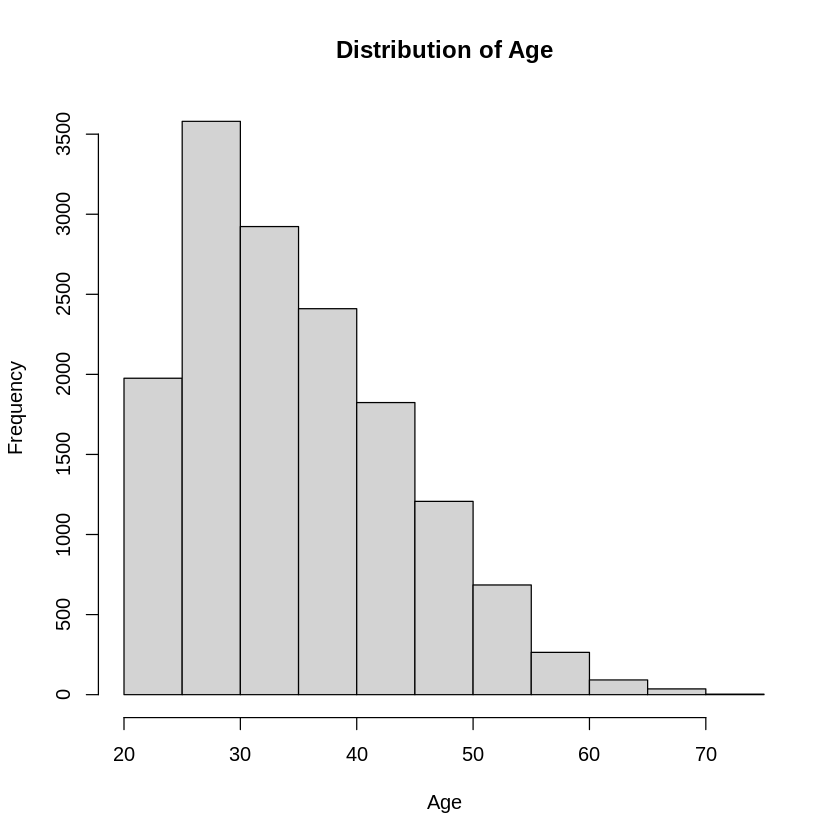

In [6]:
# Plotting the distribution of Age in the training data
hist(train_data$X5, main = "Distribution of Age", xlab = "Age")


The histogram above shows the distribution of ages within a credit risk dataset. Here are the key observations from the histogram:

- The age distribution is somewhat left-skewed, indicating a younger population, with the frequency decreasing as age increases.
- The highest frequency of individuals falls within the late 20s to early 30s, which may reflect the age group actively seeking credit.
- There is a gradual decline in frequency from this peak as age increases, with very few individuals in the dataset in their late 60s. This could suggest that older individuals are less likely to apply for credit or are underrepresented in this dataset.
- There are significantly fewer individuals in the dataset who are 20 years old than those in their late 20s. This could suggest that the credit risk dataset may include fewer young adults, possibly due to lower credit demand or eligibility at that age.

These findings could imply that the credit risk dataset represents a working-age population likely to be in the active credit market. This might be typical for credit scoring models, financial product development, or risk assessment studies. If a financial institution uses this data, it might suggest that most of its credit products should be tailored to meet the needs of young to middle-aged adults.

## Correlation Matrix

In [7]:
# Install 'corrplot' package for correlation matrix visualization
install.packages("corrplot")

# Load 'corrplot' package into current R session
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



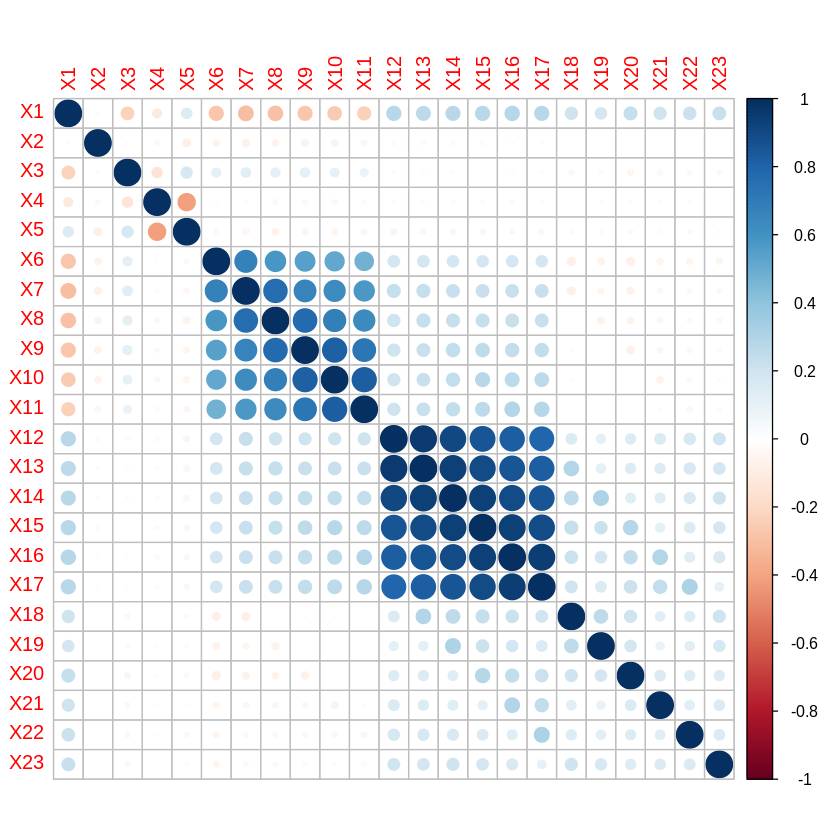

In [8]:
# Compute the correlation matrix for 'train_data' excluding the first column (response variable)
correlation_matrix <- cor(train_data[, -1])

# Visualize the correlation matrix using circular method
corrplot(correlation_matrix, method = "circle")


The heatmap above presents the following findings:

1. **Diagonal Line**: The diagonal from the top left to the bottom right shows a perfect correlation of variables with themselves, which is always 1. This is standard in all correlation matrices.

2. **Credit Amount (X1)**: The credit amount does not show a strong correlation with the majority of other variables, indicating that the credit amount might be relatively independent of factors such as gender, education, marital status, age, payment history, bill amount, and previous payment amounts.

3. **Gender (X2)**: No strong correlation is observed between gender and other variables, suggesting gender might not be a significant predictor in this dataset.

4. **Education (X3)**, **Marital Status (X4)**, and **Age (X5)**: Similar to gender, these demographics do not show strong correlations with other variables.

5. **Payment History (X6 - X11)**: These variables have a noticeable correlation pattern, indicating that past payment behaviour is likely to be similar across the months. This makes intuitive sense since past payment behaviour can indicate future payment behaviour.

6. **Bill Statement Amount (X12 - X17)**: There is also a strong correlation between these variables, suggesting consistency in the bill amounts over the six months. This could indicate stable expenditure patterns or billing cycles for the individuals in the dataset.

7. **Previous Payment Amount (X18 - X23)**: These also show a strong correlation among themselves, implying that the amount paid by a customer in one month is similar to other months, which could reflect the individual's financial habits or income stability.

8. **Cross-Variable Observations**:
   - Payment history (X6 - X11) shows some negative correlations with the following month's bill statement amount (X12 - X17), which could indicate that people who miss payments tend to have higher bill amounts or vice versa.
   - There are some correlations between the payment history and the previous payment amount, which is expected as these two are directly related.


# Data Preprocessing

**Prepare the data for a classification analysis by correctly formatting categorical variables and segregating the data into predictors and responses:**

> The following code converts variables X2, X3, and X4 in both datasets into factors. These factors are used for categorical variables with a limited, known set of values. This conversion indicates these variables are categorical, a crucial detail for specific analyses or models like regression, where categorical and continuous variables are treated differently.



In [15]:
# Convert X2, X3, and X4 to factors in both training and test datasets
train_data$X2 <- as.factor(train_data$X2)
train_data$X3 <- as.factor(train_data$X3)
train_data$X4 <- as.factor(train_data$X4)

test_data$X2 <- as.factor(test_data$X2)
test_data$X3 <- as.factor(test_data$X3)
test_data$X4 <- as.factor(test_data$X4)


> The Y variable in both datasets is converted into a factor. Y is the response variable in a classification task, where the response is typically categorical, representing different classes or categories. Converting Y to a factor ensures it is treated as a categorical outcome in later analyses or models.

In [16]:
# Ensure Y is treated as a factor for classification
train_data$Y <- as.factor(train_data$Y)
test_data$Y <- as.factor(test_data$Y)


> The code separates the predictors (independent variables) and the response (dependent variable) in the training data. It creates a predictor object by excluding the first column (the Y column) from train_data and a response object that includes only the Y variable.

In [17]:
# Separating predictors and response
predictors <- train_data[, -1]
response <- train_data$Y


# Train Models

## Decision Tree

> The following code creates a decision tree model named `dt_model` using the `report` function. It is designed for classification, as indicated by `method = "class"`. The model uses all available variables in the `train_data` dataset as predictors to determine the response variable `Y` outcome. It is building a classification tree model where `Y` is the variable being predicted based on other variables in `train_data`.

In [18]:
# 1. Decision Tree
dt_model <- rpart(Y ~ ., data = train_data, method = "class")


## Bagging

> The code below creates a random forest model for classification, named `bagging_model`, using the `randomForest` function in R. It employs the `train_data` dataset to predict the categorical response variable `Y` using all available predictors in the dataset. The model will comprise 500 decision trees, each considering two randomly chosen variables at each split. This ensemble approach, called bagging, is designed to improve the model's accuracy and robustness.

In [19]:
# 2. Bagging
# Random Forest for classification with specified parameters
bagging_model <- randomForest(Y ~ ., data = train_data, mtry = 2, ntree = 500, type = "classification")


## Random Forest

> The code creates a random forest model named `rf_model` for classification purposes using the `randomForest` function in R. It employs the `train_data` dataset, using all available variables as predictors to classify the categorical response variable `Y`. The model is tailored explicitly for classification tasks, leveraging the random forest's ability to handle numerous predictors and provide high accuracy.

In [20]:
# 3. Random Forest
# Random Forest for classification with default parameters
rf_model <- randomForest(Y ~ ., data = train_data, type = "classification")


## Gradient Boosting

> The code creates a gradient boosting model named `gbm_model` using the `gbm` function in R, designed for binary classification. It employs the `train_data` dataset, with `Y` as the binary response variable and all other variables as predictors. The model is set to use the Bernoulli distribution, indicating its suitability for binary outcomes. It will construct 1000 trees, each with a maximum interaction depth of 3, allowing the model to capture complex relationships in the data.

In [21]:
# 4. Gradient Boosting
# GBM for binary classification
gbm_model <- gbm(Y ~ ., data = train_data, distribution = "bernoulli", n.trees = 1000, interaction.depth = 3)


# Model Evaluation

## Predictions

### Decision Tree Predictions

> predict(dt_model, test_data, type = "class"): This line uses the predict function to generate predictions from the decision tree model dt_model using the test_data dataset. The type = "class" argument indicates that the predictions should be class labels (e.g., the most likely category for each observation).

In [22]:
dt_predictions <- predict(dt_model, test_data, type = "class")


### Bagging Predictions

> predict(bagging_model, test_data, type = "class"): Similar to the first line, this generates predictions from the bagging_model (a random forest model) using test_data. Again, the predictions are class labels.

In [23]:
bagging_predictions <- predict(bagging_model, test_data, type = "class")


### Random Forest Predictions

>  predict(rf_model, test_data, type = "class"): This line creates predictions from the random forest model rf_model with test_data, producing class labels as output

In [24]:
rf_predictions <- predict(rf_model, test_data, type = "class")


### Gradient Boosting Model Predictions

> predict(gbm_model, test_data, type = "response"): Here, predictions are made from the gradient boosting model gbm_model using test_data. The type = "response" argument means that the predictions will be on the scale of the outcome variable (e.g., probabilities).


In [25]:
gbm_predictions <- predict(gbm_model, test_data, type = "response")


Using 1000 trees...




> gbm_predictions <- ifelse(gbm_predictions > 0.5, 1, 0): This line converts the probability predictions from the gradient boosting model into binary class labels. If the predicted probability (gbm_predictions) is greater than 0.5, it is classified as 1; otherwise, it is classified as 0. This is typical for binary classification tasks where a threshold is used to decide the class labels based on predicted probabilities.

In [26]:
gbm_predictions <- ifelse(gbm_predictions > 0.5, 1, 0)


> The code below adjusts the factor levels of predictions from four models (decision tree, bagging, random forest, and gradient boosting) to match the response variable `Y` levels in the `test_data` dataset. This standardization ensures that the predicted categories from each model are consistent and directly comparable with the actual categories in the test data.

In [27]:
# Align the levels of predictions with test_data$Y
dt_predictions <- factor(dt_predictions, levels = levels(test_data$Y))
bagging_predictions <- factor(bagging_predictions, levels = levels(test_data$Y))
rf_predictions <- factor(rf_predictions, levels = levels(test_data$Y))
gbm_predictions <- factor(gbm_predictions, levels = levels(test_data$Y))


## Performance Metrics

### Decision Tree

In [28]:
confusionMatrix(dt_predictions, test_data$Y)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11230  2219
         1   452  1099
                                         
               Accuracy : 0.8219         
                 95% CI : (0.8157, 0.828)
    No Information Rate : 0.7788         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3614         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9613         
            Specificity : 0.3312         
         Pos Pred Value : 0.8350         
         Neg Pred Value : 0.7086         
             Prevalence : 0.7788         
         Detection Rate : 0.7487         
   Detection Prevalence : 0.8966         
      Balanced Accuracy : 0.6463         
                                         
       'Positive' Class : 0              
                                      

**Confusion Matrix:**

- True Negatives (TN): 11230 - These are the cases where the model correctly predicted that the credit card payment would not default.

- False Positives (FP): 2219 - Here, the model incorrectly predicted a default (Yes), but in reality, there was no default (No).

- False Negatives (FN): 452 - These are the cases where the model failed to predict a default (Yes) and incorrectly predicted no default (No).
    
- True Positives (TP): 1099 - These are the instances where the model correctly identified a default (Yes).

**Statistics:**

- Accuracy (0.8219): About 82.19% of all predictions are correct. This suggests that the model is generally reliable in predicting credit card payment defaults.

- No Information Rate (0.7788): This rate, being lower than the model's accuracy, indicates that the model performs better than a naive approach of always predicting the most frequent outcome (No default).

- Kappa (0.3614): Indicates moderate agreement, suggesting that the model's predictions are not just due to chance.

- Sensitivity (0.9613): High sensitivity means the model is very good at identifying cases where there will not be a default (No).

- Specificity (0.3312): Low specificity indicates that the model struggles to identify defaults (Yes) correctly.

- Positive Predictive Value (0.8350): This shows that when the model predicts no default, it is correct about 83.50% of the time.

- Negative Predictive Value (0.7086): When the model predicts a default, it is correct about 70.86% of the time.


**Interpretation in the Context of Credit Card Default:**

- The model is efficient in predicting non-default cases but could be more effective in accurately identifying default cases.

- This could lead to a scenario where many defaults are not anticipated (high false negatives), potentially leading to unexpected financial losses.

- The low specificity indicates a cautious approach; the model prefers to predict a default even when it will not happen (to avoid missing actual defaults).


**Suggestions for Improvement:**

- Focus on Specificity: Since predicting defaults accurately minimises risk, efforts should be made to improve the model's specificity.

- Balanced Data Handling: The imbalance between non-default and default cases might lead to biased predictions. Techniques like oversampling the minority class (defaults) or using specialised algorithms for imbalanced data could help.

- Cost-Sensitive Learning: Incorporate the financial implications of false positives and negatives into the model. This might involve adjusting the decision threshold to reflect the cost of predicting a false default versus missing a real one.

- Feature Engineering: Explore if additional features or transformations could improve the model's ability to detect defaults.

- Alternative Models: Experiment with other models (like random forests, gradient boosting, or neural networks) that better capture the complex patterns associated with defaults.


In [29]:
confusionMatrix(bagging_predictions, test_data$Y)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11675   182
         1     7  3136
                                          
               Accuracy : 0.9874          
                 95% CI : (0.9855, 0.9891)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9627          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9994          
            Specificity : 0.9451          
         Pos Pred Value : 0.9847          
         Neg Pred Value : 0.9978          
             Prevalence : 0.7788          
         Detection Rate : 0.7783          
   Detection Prevalence : 0.7905          
      Balanced Accuracy : 0.9723          
                                          
       'Positive' Class : 0               
                  

In [30]:
confusionMatrix(rf_predictions, test_data$Y)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11679    96
         1     3  3222
                                         
               Accuracy : 0.9934         
                 95% CI : (0.992, 0.9946)
    No Information Rate : 0.7788         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9806         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9997         
            Specificity : 0.9711         
         Pos Pred Value : 0.9918         
         Neg Pred Value : 0.9991         
             Prevalence : 0.7788         
         Detection Rate : 0.7786         
   Detection Prevalence : 0.7850         
      Balanced Accuracy : 0.9854         
                                         
       'Positive' Class : 0              
                                      

In [31]:
confusionMatrix(gbm_predictions, test_data$Y)


Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 0 0
         1 0 0
                                  
               Accuracy : NaN     
                 95% CI : (NA, NA)
    No Information Rate : NA      
    P-Value [Acc > NIR] : NA      
                                  
                  Kappa : NaN     
                                  
 Mcnemar's Test P-Value : NA      
                                  
            Sensitivity :  NA     
            Specificity :  NA     
         Pos Pred Value :  NA     
         Neg Pred Value :  NA     
             Prevalence : NaN     
         Detection Rate : NaN     
   Detection Prevalence : NaN     
      Balanced Accuracy :  NA     
                                  
       'Positive' Class : 0       
                                  